In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV

# part1

In [2]:
cols = ['val '+str(i) for i in range(1,280)] + ['Class']
df=pd.read_csv('arrhythmia.data',names=cols)
df.head()

,val 1,val 2,val 3,val 4,val 5,val 6,val 7,val 8,val 9,val 10,...,val 271,val 272,val 273,val 274,val 275,val 276,val 277,val 278,val 279,Class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7


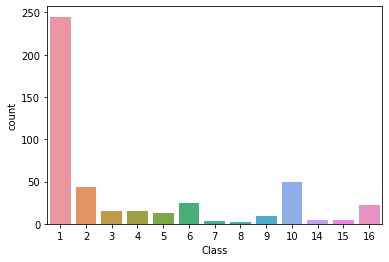

In [3]:
sns.countplot(x='Class',data=df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, val 1 to Class
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [5]:
df.replace('?',np.nan,inplace=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)

     val 1  val 2  val 3  val 4  val 5  val 6  val 7  val 8  val 9  val 10  \
0       75      0    190     80     91    193    371    174    121     -16   
1       56      1    165     64     81    174    401    149     39      25   
2       54      0    172     95    138    163    386    185    102      96   
3       55      0    175     94    100    202    380    179    143      28   
4       75      0    190     80     88    181    360    177    103     -16   
5       13      0    169     51    100    167    321    174     91     107   
6       40      1    160     52     77    129    377    133     77      77   
7       49      1    162     54     78      0    376    157     70      67   
8       44      0    168     56     84    118    354    160     63      61   
9       50      1    167     67     89    130    383    156     73      85   
10      62      0    170     72    102    135    401    156     83      72   
11      45      1    165     86     77    143    373    150     

In [6]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df.isnull().sum())

val 1        0
val 2        0
val 3        0
val 4        0
val 5        0
val 6        0
val 7        0
val 8        0
val 9        0
val 10       0
val 11       8
val 12      22
val 13       1
val 14     376
val 15       1
val 16       0
val 17       0
val 18       0
val 19       0
val 20       0
val 21       0
val 22       0
val 23       0
val 24       0
val 25       0
val 26       0
val 27       0
val 28       0
val 29       0
val 30       0
val 31       0
val 32       0
val 33       0
val 34       0
val 35       0
val 36       0
val 37       0
val 38       0
val 39       0
val 40       0
val 41       0
val 42       0
val 43       0
val 44       0
val 45       0
val 46       0
val 47       0
val 48       0
val 49       0
val 50       0
val 51       0
val 52       0
val 53       0
val 54       0
val 55       0
val 56       0
val 57       0
val 58       0
val 59       0
val 60       0
val 61       0
val 62       0
val 63       0
val 64       0
val 65       0
val 66       0
val 67    

In [7]:
imputer1=SimpleImputer(strategy='mean')
df.iloc[:,10:15] =imputer1.fit_transform(df.iloc[:,10:15])
df

,val 1,val 2,val 3,val 4,val 5,val 6,val 7,val 8,val 9,val 10,...,val 271,val 272,val 273,val 274,val 275,val 276,val 277,val 278,val 279,Class
0,75,0,190,80,91,193,371,174,121,-16,...,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,...,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,...,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,...,0.0,12.2,-2.2,0.0,0.0,0.4,2.6,34.6,61.6,1
4,75,0,190,80,88,181,360,177,103,-16,...,0.0,13.1,-3.6,0.0,0.0,-0.1,3.9,25.4,62.8,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,53,1,160,70,80,199,382,154,117,-37,...,0.0,4.3,-5.0,0.0,0.0,0.7,0.6,-4.4,-0.5,1
448,37,0,190,85,100,137,361,201,73,86,...,0.0,15.6,-1.6,0.0,0.0,0.4,2.4,38.0,62.4,10
449,36,0,166,68,108,176,365,194,116,-85,...,0.0,16.3,-28.6,0.0,0.0,1.5,1.0,-44.2,-33.2,2
450,32,1,155,55,93,106,386,218,63,54,...,-0.4,12.0,-0.7,0.0,0.0,0.5,2.4,25.0,46.6,1


In [8]:
df.count()

val 1      452
val 2      452
val 3      452
val 4      452
val 5      452
          ... 
val 276    452
val 277    452
val 278    452
val 279    452
Class      452
Length: 280, dtype: int64

# part2

In [9]:
target = df['Class']
x_vals = df.drop(['Class'],axis=1,inplace=False)

In [10]:
scalar=MinMaxScaler()
x_vals = scalar.fit_transform(x_vals)
x_vals

array([[0.90361446, 0.        , 0.12592593, ..., 0.74166667, 0.5075188 ,
        0.56957929],
       [0.6746988 , 1.        , 0.08888889, ..., 0.675     , 0.48571429,
        0.50097087],
       [0.65060241, 0.        , 0.09925926, ..., 0.78333333, 0.42481203,
        0.56699029],
       ...,
       [0.43373494, 0.        , 0.09037037, ..., 0.58333333, 0.        ,
        0.03495146],
       [0.38554217, 1.        , 0.07407407, ..., 0.7       , 0.52030075,
        0.55145631],
       [0.93975904, 1.        , 0.08148148, ..., 0.63333333, 0.4924812 ,
        0.46213592]])

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x_vals,target,test_size=0.30)

In [12]:
knn1=KNeighborsClassifier(n_neighbors=1,metric='euclidean')
knn1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [13]:
target_perdiction1=knn1.predict(x_test)
train_perdiction1=knn1.predict(x_train)

In [14]:
confusion_matrix(y_test,target_perdiction1)

array([[59,  4,  0,  0,  3,  5,  1,  0,  0,  4,  0,  1],
       [ 9,  1,  0,  0,  0,  1,  0,  1,  0,  1,  0,  0],
       [ 1,  0,  5,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  4,  0,  0,  0,  1,  0,  1,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 3,  1,  0,  0,  0,  2,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  2,  0,  0,  1],
       [ 8,  0,  0,  0,  0,  0,  0,  0,  0,  5,  0,  2],
       [ 0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [15]:
print(classification_report(y_test,target_perdiction1))

              precision    recall  f1-score   support

           1       0.70      0.77      0.73        77
           2       0.12      0.08      0.10        13
           3       1.00      0.71      0.83         7
           4       1.00      0.67      0.80         6
           5       0.00      0.00      0.00         4
           6       0.22      0.29      0.25         7
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       1.00      0.50      0.67         4
          10       0.38      0.33      0.36        15
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2

    accuracy                           0.57       136
   macro avg       0.37      0.28      0.31       136
weighted avg       0.59      0.57      0.57       136



c:\users\mini\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\mini\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [16]:
confusion_matrix(y_train,train_perdiction1)

array([[168,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   9,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  18,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   3,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   2,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   5,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  35,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  20]],
      dtype=int64)

In [17]:
print(classification_report(y_train,train_perdiction1))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       168
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         9
           5       1.00      1.00      1.00         9
           6       1.00      1.00      1.00        18
           7       1.00      1.00      1.00         3
           8       1.00      1.00      1.00         2
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00        35
          14       1.00      1.00      1.00         3
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00        20

    accuracy                           1.00       316
   macro avg       1.00      1.00      1.00       316
weighted avg       1.00      1.00      1.00       316



In [18]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

y_test_binarrize = label_binarize(y_test, classes=[i+1 for i in range(16)])
test_perdiction1_binarize = label_binarize(target_perdiction1, classes=[i+1 for i in range(16)])

y_train_binarrize = label_binarize(y_train, classes=[i+1 for i in range(16)])
train_perdiction1_binarize = label_binarize(train_perdiction1, classes=[i+1 for i in range(16)])

In [19]:
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

for i in range(16):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_binarrize[:, i], test_perdiction1_binarize[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

fpr_test["micro"], tpr_test["micro"], _ = roc_curve(y_test_binarrize.ravel(),test_perdiction1_binarize.ravel())
roc_auc_test["micro"] = auc(fpr_test["micro"], tpr_test["micro"])


c:\users\mini\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_ranking.py:806: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


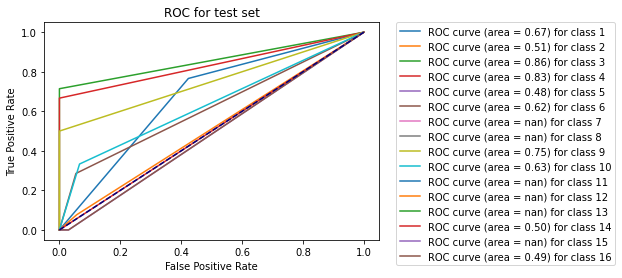

In [20]:
plt.figure()
for i in range(16):
    plt.plot(fpr_test[i], tpr_test[i], label='ROC curve (area = %0.2f) for class %s' % (roc_auc_test[i],(i+1)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for test set')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [21]:
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()

for i in range(16):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_binarrize[:, i], train_perdiction1_binarize[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

fpr_train["micro"], tpr_train["micro"], _ = roc_curve(y_train_binarrize.ravel(), train_perdiction1_binarize.ravel())
roc_auc_train["micro"] = auc(fpr_train["micro"], tpr_train["micro"])

c:\users\mini\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_ranking.py:806: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


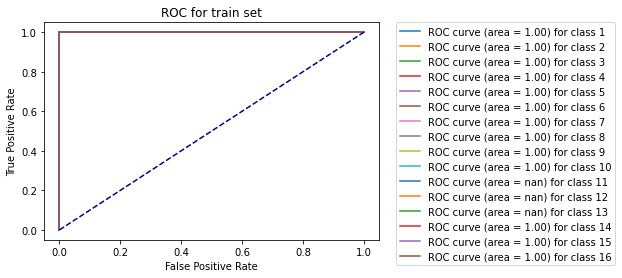

In [24]:
plt.figure()
for i in range(16):
    plt.plot(fpr_train[i], tpr_train[i], label='ROC curve (area = %0.2f) for class %s' % (roc_auc_train[i],(i+1)))
    #plt.show()
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for train set')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [23]:
knn3=KNeighborsClassifier(n_neighbors=30,metric='manhattan')
knn3.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [24]:
target_perdiction3=knn3.predict(x_test)
train_perdiction3=knn3.predict(x_train)

In [25]:
confusion_matrix(y_test,target_perdiction3)

array([[76,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [17,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 7,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [16,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 5,  0,  0,  0,  0,  0,  0,  0,  0,  0]], dtype=int64)

In [26]:
print(classification_report(y_test,target_perdiction3))

              precision    recall  f1-score   support

           1       0.56      1.00      0.72        76
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         1
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00        16
          16       0.00      0.00      0.00         5

    accuracy                           0.56       136
   macro avg       0.06      0.10      0.07       136
weighted avg       0.31      0.56      0.40       136



c:\users\mini\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [27]:
confusion_matrix(y_train,train_perdiction3)

array([[169,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 27,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 18,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  8,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 34,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  4,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 17,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0]],
      dtype=int64)

In [28]:
print(classification_report(y_train,train_perdiction3))

              precision    recall  f1-score   support

           1       0.53      1.00      0.70       169
           2       0.00      0.00      0.00        27
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00        11
           5       0.00      0.00      0.00        11
           6       0.00      0.00      0.00        18
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         8
          10       0.00      0.00      0.00        34
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00        17

    accuracy                           0.53       316
   macro avg       0.04      0.08      0.05       316
weighted avg       0.29      0.53      0.37       316



In [29]:
test_perdiction3_binarize = label_binarize(target_perdiction3, classes=[i+1 for i in range(16)])
train_perdiction3_binarize = label_binarize(train_perdiction3, classes=[i+1 for i in range(16)])

In [30]:
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

for i in range(16):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_binarrize[:, i], test_perdiction3_binarize[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

fpr_test["micro"], tpr_test["micro"], _ = roc_curve(y_test_binarrize.ravel(),test_perdiction3_binarize.ravel())
roc_auc_test["micro"] = auc(fpr_test["micro"], tpr_test["micro"])

c:\users\mini\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_ranking.py:806: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


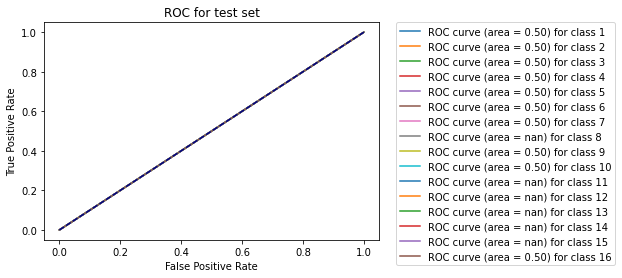

In [31]:
plt.figure()
for i in range(16):
    plt.plot(fpr_test[i], tpr_test[i], label='ROC curve (area = %0.2f) for class %s' % (roc_auc_test[i],(i+1)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for test set')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [32]:
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()

for i in range(16):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_binarrize[:, i], train_perdiction3_binarize[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

fpr_train["micro"], tpr_train["micro"], _ = roc_curve(y_train_binarrize.ravel(), train_perdiction3_binarize.ravel())
roc_auc_train["micro"] = auc(fpr_train["micro"], tpr_train["micro"])

c:\users\mini\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_ranking.py:806: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


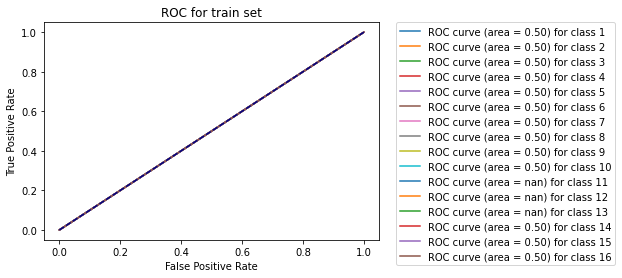

In [33]:
plt.figure()
for i in range(16):
    plt.plot(fpr_train[i], tpr_train[i], label='ROC curve (area = %0.2f) for class %s' % (roc_auc_train[i],(i+1)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for train set')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

# part3

In [30]:
knn=KNeighborsClassifier()
param = {'n_neighbors':list(range(1,30)),'metric':['euclidean','manhattan','cosine']}
grid=GridSearchCV(knn,param,verbose=3,cv=5)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 87 candidates, totalling 435 fits
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.469, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.476, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.492, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.540, total=   0.0s
[CV] metric=euclidean, n_neighbors=1 .................................
[CV] ..... metric=euclidean, n_neighbors=1, score=0.476, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metric=euclidean, n_neighbors=2, score=0.562, total=   0.0s
[CV] metric=euclidean, n_neighbors=2 .................................
[CV] ..... metr

c:\users\mini\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:665: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ..... metric=euclidean, n_neighbors=2, score=0.540, total=   0.0s
[CV] metric=euclidean, n_neighbors=3 .................................
[CV] ..... metric=euclidean, n_neighbors=3, score=0.578, total=   0.0s
[CV] metric=euclidean, n_neighbors=3 .................................
[CV] ..... metric=euclidean, n_neighbors=3, score=0.556, total=   0.0s
[CV] metric=euclidean, n_neighbors=3 .................................
[CV] ..... metric=euclidean, n_neighbors=3, score=0.508, total=   0.0s
[CV] metric=euclidean, n_neighbors=3 .................................
[CV] ..... metric=euclidean, n_neighbors=3, score=0.603, total=   0.0s
[CV] metric=euclidean, n_neighbors=3 .................................
[CV] ..... metric=euclidean, n_neighbors=3, score=0.571, total=   0.0s
[CV] metric=euclidean, n_neighbors=4 .................................
[CV] ..... metric=euclidean, n_neighbors=4, score=0.547, total=   0.0s
[CV] metric=euclidean, n_neighbors=4 .................................
[CV] .

[CV] .... metric=euclidean, n_neighbors=15, score=0.524, total=   0.0s
[CV] metric=euclidean, n_neighbors=15 ................................
[CV] .... metric=euclidean, n_neighbors=15, score=0.556, total=   0.0s
[CV] metric=euclidean, n_neighbors=16 ................................
[CV] .... metric=euclidean, n_neighbors=16, score=0.547, total=   0.0s
[CV] metric=euclidean, n_neighbors=16 ................................
[CV] .... metric=euclidean, n_neighbors=16, score=0.540, total=   0.0s
[CV] metric=euclidean, n_neighbors=16 ................................
[CV] .... metric=euclidean, n_neighbors=16, score=0.571, total=   0.0s
[CV] metric=euclidean, n_neighbors=16 ................................
[CV] .... metric=euclidean, n_neighbors=16, score=0.524, total=   0.0s
[CV] metric=euclidean, n_neighbors=16 ................................
[CV] .... metric=euclidean, n_neighbors=16, score=0.556, total=   0.0s
[CV] metric=euclidean, n_neighbors=17 ................................
[CV] .

[CV] .... metric=euclidean, n_neighbors=27, score=0.524, total=   0.0s
[CV] metric=euclidean, n_neighbors=27 ................................
[CV] .... metric=euclidean, n_neighbors=27, score=0.540, total=   0.0s
[CV] metric=euclidean, n_neighbors=28 ................................
[CV] .... metric=euclidean, n_neighbors=28, score=0.531, total=   0.0s
[CV] metric=euclidean, n_neighbors=28 ................................
[CV] .... metric=euclidean, n_neighbors=28, score=0.540, total=   0.0s
[CV] metric=euclidean, n_neighbors=28 ................................
[CV] .... metric=euclidean, n_neighbors=28, score=0.540, total=   0.0s
[CV] metric=euclidean, n_neighbors=28 ................................
[CV] .... metric=euclidean, n_neighbors=28, score=0.524, total=   0.0s
[CV] metric=euclidean, n_neighbors=28 ................................
[CV] .... metric=euclidean, n_neighbors=28, score=0.540, total=   0.0s
[CV] metric=euclidean, n_neighbors=29 ................................
[CV] .

[CV] .... metric=manhattan, n_neighbors=10, score=0.571, total=   0.0s
[CV] metric=manhattan, n_neighbors=10 ................................
[CV] .... metric=manhattan, n_neighbors=10, score=0.540, total=   0.0s
[CV] metric=manhattan, n_neighbors=10 ................................
[CV] .... metric=manhattan, n_neighbors=10, score=0.556, total=   0.0s
[CV] metric=manhattan, n_neighbors=11 ................................
[CV] .... metric=manhattan, n_neighbors=11, score=0.547, total=   0.0s
[CV] metric=manhattan, n_neighbors=11 ................................
[CV] .... metric=manhattan, n_neighbors=11, score=0.540, total=   0.0s
[CV] metric=manhattan, n_neighbors=11 ................................
[CV] .... metric=manhattan, n_neighbors=11, score=0.556, total=   0.0s
[CV] metric=manhattan, n_neighbors=11 ................................
[CV] .... metric=manhattan, n_neighbors=11, score=0.540, total=   0.0s
[CV] metric=manhattan, n_neighbors=11 ................................
[CV] .

[CV] .... metric=manhattan, n_neighbors=23, score=0.540, total=   0.0s
[CV] metric=manhattan, n_neighbors=24 ................................
[CV] .... metric=manhattan, n_neighbors=24, score=0.531, total=   0.0s
[CV] metric=manhattan, n_neighbors=24 ................................
[CV] .... metric=manhattan, n_neighbors=24, score=0.540, total=   0.0s
[CV] metric=manhattan, n_neighbors=24 ................................
[CV] .... metric=manhattan, n_neighbors=24, score=0.540, total=   0.0s
[CV] metric=manhattan, n_neighbors=24 ................................
[CV] .... metric=manhattan, n_neighbors=24, score=0.524, total=   0.0s
[CV] metric=manhattan, n_neighbors=24 ................................
[CV] .... metric=manhattan, n_neighbors=24, score=0.540, total=   0.0s
[CV] metric=manhattan, n_neighbors=25 ................................
[CV] .... metric=manhattan, n_neighbors=25, score=0.531, total=   0.0s
[CV] metric=manhattan, n_neighbors=25 ................................
[CV] .

[CV] ........ metric=cosine, n_neighbors=7, score=0.571, total=   0.0s
[CV] metric=cosine, n_neighbors=7 ....................................
[CV] ........ metric=cosine, n_neighbors=7, score=0.571, total=   0.0s
[CV] metric=cosine, n_neighbors=7 ....................................
[CV] ........ metric=cosine, n_neighbors=7, score=0.571, total=   0.0s
[CV] metric=cosine, n_neighbors=8 ....................................
[CV] ........ metric=cosine, n_neighbors=8, score=0.547, total=   0.0s
[CV] metric=cosine, n_neighbors=8 ....................................
[CV] ........ metric=cosine, n_neighbors=8, score=0.540, total=   0.0s
[CV] metric=cosine, n_neighbors=8 ....................................
[CV] ........ metric=cosine, n_neighbors=8, score=0.571, total=   0.0s
[CV] metric=cosine, n_neighbors=8 ....................................
[CV] ........ metric=cosine, n_neighbors=8, score=0.556, total=   0.0s
[CV] metric=cosine, n_neighbors=8 ....................................
[CV] .

[CV] ....... metric=cosine, n_neighbors=22, score=0.556, total=   0.0s
[CV] metric=cosine, n_neighbors=22 ...................................
[CV] ....... metric=cosine, n_neighbors=22, score=0.524, total=   0.0s
[CV] metric=cosine, n_neighbors=22 ...................................
[CV] ....... metric=cosine, n_neighbors=22, score=0.540, total=   0.0s
[CV] metric=cosine, n_neighbors=23 ...................................
[CV] ....... metric=cosine, n_neighbors=23, score=0.531, total=   0.0s
[CV] metric=cosine, n_neighbors=23 ...................................
[CV] ....... metric=cosine, n_neighbors=23, score=0.540, total=   0.0s
[CV] metric=cosine, n_neighbors=23 ...................................
[CV] ....... metric=cosine, n_neighbors=23, score=0.540, total=   0.0s
[CV] metric=cosine, n_neighbors=23 ...................................
[CV] ....... metric=cosine, n_neighbors=23, score=0.524, total=   0.0s
[CV] metric=cosine, n_neighbors=23 ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 435 out of 435 | elapsed:    6.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'cosine'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [31]:
grid.best_params_

{'metric': 'cosine', 'n_neighbors': 5}

In [32]:
grid_test_prediction=grid.predict(x_test)
grid_train_prediction=grid.predict(x_train)

In [33]:
confusion_matrix(y_test,grid_test_prediction)

array([[75,  1,  0,  0,  1,  0,  0,  0,  0,  0],
       [12,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  1,  0,  0,  0,  0],
       [ 3,  0,  0,  3,  0,  0,  0,  0,  0,  0],
       [ 2,  1,  0,  0,  0,  0,  0,  1,  0,  0],
       [ 7,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 3,  0,  0,  0,  0,  0,  1,  0,  0,  0],
       [14,  1,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  1,  0,  0,  0,  0]], dtype=int64)

In [34]:
print(classification_report(y_test,grid_test_prediction))

              precision    recall  f1-score   support

           1       0.64      0.97      0.77        77
           2       0.25      0.08      0.12        13
           3       1.00      0.86      0.92         7
           4       1.00      0.50      0.67         6
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         7
           9       1.00      0.25      0.40         4
          10       0.00      0.00      0.00        15
          14       0.00      0.00      0.00         1
          16       0.00      0.00      0.00         2

    accuracy                           0.63       136
   macro avg       0.39      0.27      0.29       136
weighted avg       0.51      0.63      0.54       136



c:\users\mini\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
confusion_matrix(y_train,grid_train_prediction)

array([[167,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 27,   3,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0,   5,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0,   0,   6,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  8,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0],
       [ 17,   0,   0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0],
       [  2,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   1,   0,   0,   2,   0,   0,   0,   0],
       [ 24,   0,   0,   0,   0,   0,   0,   0,   0,  11,   0,   0,   0],
       [  3,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  3,   0,   0,   1,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [ 17,   0,   0,   0,   1,   1,   0,   0,   0,   1,   0,   0,   0]],
      dtype=int64)

In [36]:
print(classification_report(y_train,grid_train_prediction))

              precision    recall  f1-score   support

           1       0.60      0.99      0.75       168
           2       0.60      0.10      0.17        31
           3       1.00      0.62      0.77         8
           4       0.86      0.67      0.75         9
           5       0.50      0.11      0.18         9
           6       0.25      0.06      0.09        18
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00         2
           9       1.00      0.40      0.57         5
          10       0.85      0.31      0.46        35
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         5
          16       0.00      0.00      0.00        20

    accuracy                           0.62       316
   macro avg       0.43      0.25      0.29       316
weighted avg       0.57      0.62      0.53       316



In [37]:
grid_test_perdiction_binarize = label_binarize(grid_test_prediction, classes=[i+1 for i in range(16)])
grid_train_perdiction_binarize = label_binarize(grid_train_prediction, classes=[i+1 for i in range(16)])

In [38]:
fpr_test = dict()
tpr_test = dict()
roc_auc_test = dict()

for i in range(16):
    fpr_test[i], tpr_test[i], _ = roc_curve(y_test_binarrize[:, i], grid_test_perdiction_binarize[:, i])
    roc_auc_test[i] = auc(fpr_test[i], tpr_test[i])

fpr_test["micro"], tpr_test["micro"], _ = roc_curve(y_test_binarrize.ravel(),grid_test_perdiction_binarize.ravel())
roc_auc_test["micro"] = auc(fpr_test["micro"], tpr_test["micro"])

c:\users\mini\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_ranking.py:806: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


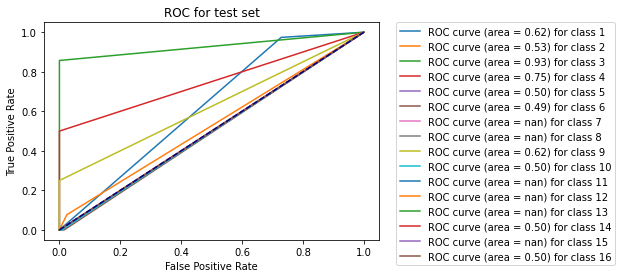

In [40]:
plt.figure()
for i in range(16):
    plt.plot(fpr_test[i], tpr_test[i], label='ROC curve (area = %0.2f) for class %s' % (roc_auc_test[i],(i+1)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for test set')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()

In [41]:
fpr_train = dict()
tpr_train = dict()
roc_auc_train = dict()

for i in range(16):
    fpr_train[i], tpr_train[i], _ = roc_curve(y_train_binarrize[:, i], grid_train_perdiction_binarize[:, i])
    roc_auc_train[i] = auc(fpr_train[i], tpr_train[i])

fpr_train["micro"], tpr_train["micro"], _ = roc_curve(y_train_binarrize.ravel(), grid_train_perdiction_binarize.ravel())
roc_auc_train["micro"] = auc(fpr_train["micro"], tpr_train["micro"])

c:\users\mini\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_ranking.py:806: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn("No positive samples in y_true, "


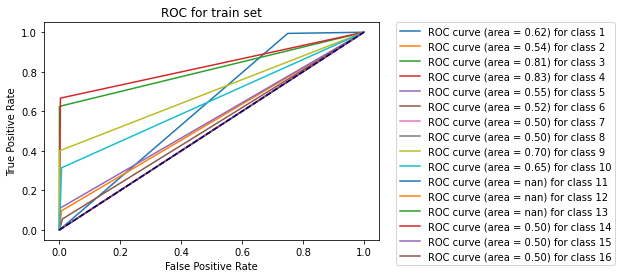

In [43]:
plt.figure()
for i in range(16):
    plt.plot(fpr_train[i], tpr_train[i], label='ROC curve (area = %0.2f) for class %s' % (roc_auc_train[i],(i+1)))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for train set')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()